In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Load Boston dataset from the original source
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]

df = pd.DataFrame(data)  # Create DataFrame from the loaded data
# Assign column names (you might need to adjust these based on the dataset)
df.columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']
df['target'] = target # Add the target variable

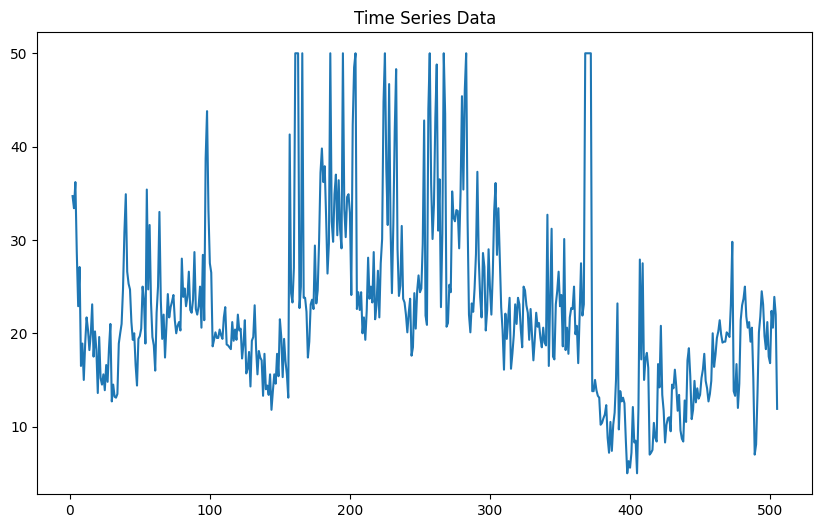

Root Mean Squared Error: 4.65


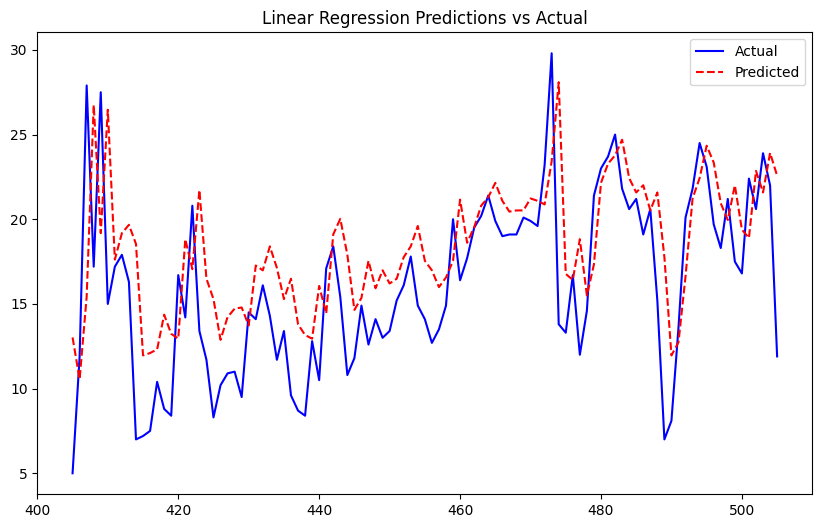

Forecasted values for the next 5 periods: [np.float64(15.426692303536747), np.float64(17.9220540219531), np.float64(19.68768299375006), np.float64(20.936979095009168), np.float64(21.82093646858623)]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [7]:
# Assuming 'target' column represents sales, you can plot it
df['target'].plot(title='Time Series Data', figsize=(10, 6))
plt.show()

# Create Lag Features (e.g., lag by 1 day)
df['Lag1'] = df['target'].shift(1)  # Use 'target' column and DataFrame for shift
df.dropna(inplace=True)  # Remove missing values after shifting

# Split into features and target
X = df[['Lag1']]  # Feature(s)
y = df['target']   # Target

# Train-test split (keeping the time series order intact)
train_size = int(len(df) * 0.8)  # Use DataFrame length
train_X, test_X = X[:train_size], X[train_size:]
train_y, test_y = y[:train_size], y[train_size:]

# Initialize and fit the Linear Regression model
model = LinearRegression()
model.fit(train_X, train_y)


# Make predictions on the test set
predictions = model.predict(test_X)

# Evaluate the model (Mean Squared Error)
mse = mean_squared_error(test_y, predictions)
rmse = np.sqrt(mse)

print(f"Root Mean Squared Error: {rmse:.2f}")

# Visualize the predictions vs actual values
plt.figure(figsize=(10, 6))
plt.plot(test_y.index, test_y, label='Actual', color='blue')
plt.plot(test_y.index, predictions, label='Predicted', color='red', linestyle='--')
plt.title('Linear Regression Predictions vs Actual')
plt.legend()
plt.show()

# Forecasting future values (let's predict for the next 5 time steps)
# Use the 'target' column from the DataFrame 'df' instead of 'data'
last_known_value = df['target'].iloc[-1]  # Take the last value of the series from the 'target' column
predicted_future = []

for i in range(5):  # Forecasting next 5 periods
    # Reshape the input to a 2D array with one row and one column
    future_value = model.predict(np.array([[last_known_value]]))
    predicted_future.append(future_value[0])
    # Update last_known_value with the predicted value (a scalar)
    last_known_value = future_value[0]  # Extract the scalar value from the prediction

print("Forecasted values for the next 5 periods:", predicted_future)